In [2]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/car_evaluation.csv')
%pwd
#https://neptune.ai/blog/google-colab-dealing-with-files

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

feats = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
data.columns = col_names

data.head(10)

Mounted at /content/drive


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


# New Section

In [3]:
print(data.shape)

(1727, 7)


<Axes: >

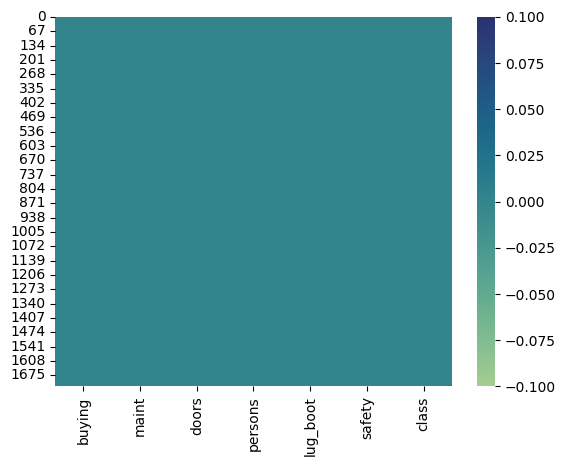

In [4]:
sbn.heatmap(data.isnull(), cmap = 'crest')

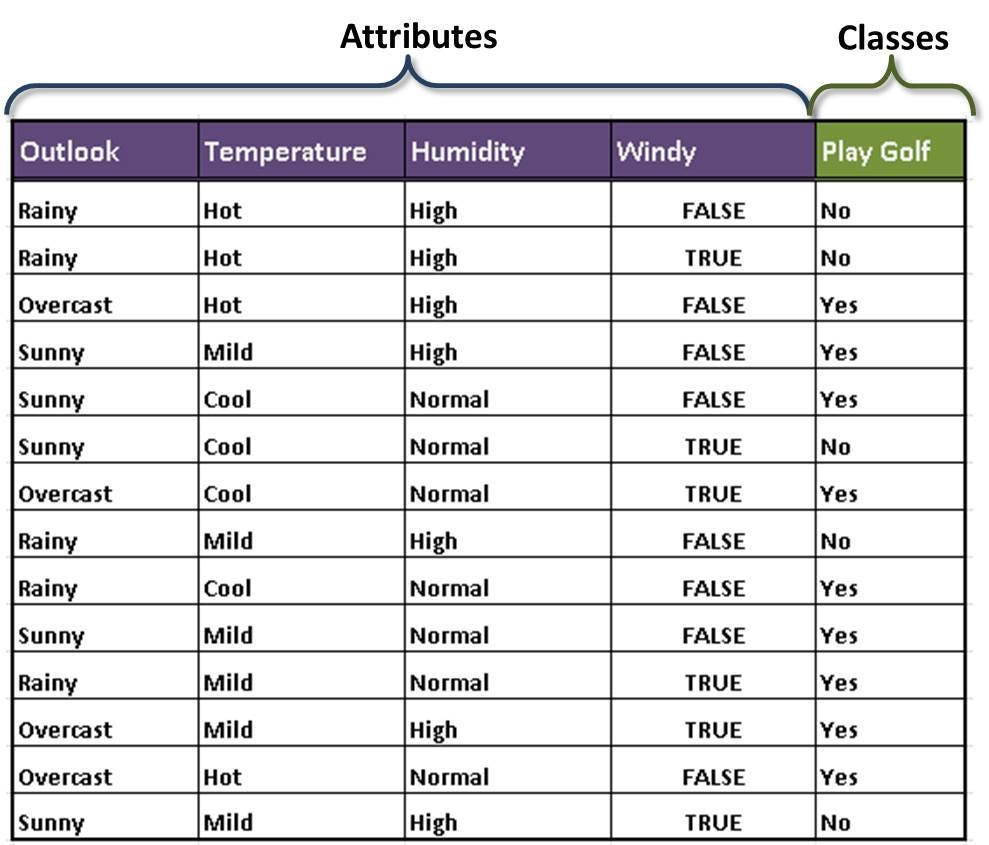

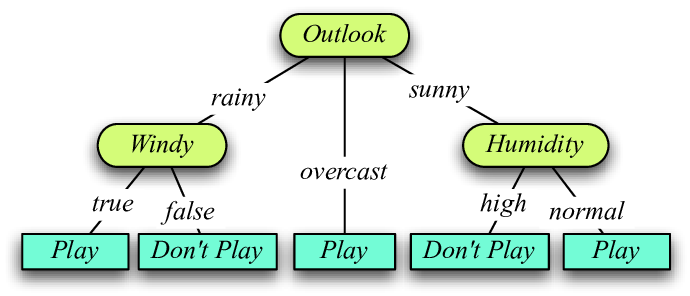

In [5]:
data = pd.DataFrame({'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
                        'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
                        'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
                        'Windy': ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True'],
                        'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
                        })

In [6]:
# X = data.drop(['class'], axis=1)

# y = data['class']

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# X_train.shape, X_test.shape


X = data.drop(['Play'], axis=1)

y = data['Play']

from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0, random_state = 42)
X_train = X
y_train = y

print(X_train,y_train)

     Outlook Temperature Humidity  Windy
0      Rainy         Hot     High  False
1      Rainy         Hot     High   True
2   Overcast         Hot     High  False
3      Sunny        Mild     High  False
4      Sunny        Cool   Normal  False
5      Sunny        Cool   Normal   True
6   Overcast        Cool   Normal   True
7      Rainy        Mild     High  False
8      Rainy        Cool   Normal  False
9      Sunny        Mild   Normal  False
10     Rainy        Mild   Normal   True
11  Overcast        Mild     High   True
12  Overcast         Hot   Normal  False
13     Sunny        Mild     High   True 0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play, dtype: object


In [7]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.5 MB/s eta 0:00:00


In [8]:
import category_encoders as ce
# encode categorical variables with ordinal encoding

# encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
# tencoder = ce.OrdinalEncoder(cols = ['class'])

encoder = ce.OrdinalEncoder(cols=['Outlook', 'Temperature', 'Windy', 'Humidity'])
tencoder = ce.OrdinalEncoder(cols = ['Play'])


X_train = encoder.fit_transform(X_train)
y_train = tencoder.fit_transform(y_train)
# X_test = encoder.transform(X_test)
# y_test = tencoder.transform(y_test)


X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
print(f"X_train = {X_train}\n y_train = {y_train}")
# X_test = X_test.to_numpy()
# y_test = y_test.to_numpy()



X_train = [[1 1 1 1]
 [1 1 1 2]
 [2 1 1 1]
 [3 2 1 1]
 [3 3 2 1]
 [3 3 2 2]
 [2 3 2 2]
 [1 2 1 1]
 [1 3 2 1]
 [3 2 2 1]
 [1 2 2 2]
 [2 2 1 2]
 [2 1 2 1]
 [3 2 1 2]]
 y_train = [[1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]]


In [13]:
class DecisionTree():
    def __init__(self, _X, _y, _features, map):
      self.X = _X
      self.y = _y
      self.features = _features
      self.decision = None
      self.dictionary = {}
      self.attribute_name = ""
      self.feature_map = map

    def entropy(self, arr):
        total = np.sum(arr)
        entropy_val = 0

        for i in arr:
            if i != 0:
                prob = i / total
                entropy_val -= prob * math.log2(prob)

        return entropy_val

    def find_best_attribute(self, X, y, attributes):
        max_info_gain = float('-inf')
        best_attribute = None



        total_entropy = self.entropy(np.bincount(y.flatten()))

        for attribute in attributes:
            idx = self.feature_map[attribute]
            unique_values = np.unique(X[:, idx])

            weighted_entropy = 0
            for value in unique_values:
                subset_indices = np.where(X[:, idx] == value)
                subset_y = y[subset_indices]
                value_entropy = self.entropy(np.bincount(subset_y.flatten()))
                subset_weight = len(subset_indices[0]) / len(X)
                weighted_entropy += subset_weight * (value_entropy if value_entropy is not None else 0)

            info_gain =  (total_entropy if total_entropy is not None else 0) - weighted_entropy

            if info_gain > max_info_gain:
                max_info_gain = info_gain
                best_attribute = attribute

        return best_attribute

    def build(self, feats):
        if len(np.unique(self.y)) == 1:
            self.decision = np.unique(self.y)[0]
            return
        if len(feats) == 0:
            self.decision = np.argmax(np.bincount(self.y.flatten()))
            return

        best_attribute = self.find_best_attribute(self.X, self.y, feats)
        self.attribute_name = best_attribute

        idx = self.feature_map[best_attribute]
        unique_values = np.unique(self.X[:, idx])

        self.dictionary[self.attribute_name] = {}

        for value in unique_values:
            subset_indices = np.where(self.X[:, idx] == value)
            subset_X = self.X[subset_indices]
            subset_y = self.y[subset_indices]

            if len(subset_y) == 0:
                self.dictionary[self.attribute_name][value] = np.argmax(np.bincount(self.y.flatten()))
            else:
                new_feats = [feat for feat in feats if feat != best_attribute]
                subtree = DecisionTree(subset_X, subset_y, new_feats, self.feature_map)
                subtree.build(new_feats)
                self.dictionary[self.attribute_name][value] = subtree

    def predict(self, x):
        if self.decision is not None:
            return self.decision

        attribute_value = x[self.feature_map[self.attribute_name]]
        if attribute_value not in self.dictionary[self.attribute_name]:

            return np.argmax(np.bincount(self.y.flatten()))

        return self.dictionary[self.attribute_name][attribute_value].predict(x)


    def print_the_tree(self, level=0, prefix='', parent_branch_value=None):
        feature_values = {"Outlook":["Rainy","Overcast","Sunny"],"Windy":["True","False"],"Humidity":["High","Normal"]}
        if self.decision is not None:
            print('  ' * level + '|-- Decision:', "Don't Play" if self.decision == 1 else "Play")
            return

        print('  ' * level + '|-- Attribute:', self.attribute_name)

        for value, subtree in self.dictionary[self.attribute_name].items():
            if parent_branch_value is not None:
                print('  ' * (level + 1) + '|-- Value:', parent_branch_value, '==', value)
            else:
                print('  ' * (level + 1) + '|-- Value:', feature_values[self.attribute_name][value-1])
            subtree.print_the_tree(level + 2, value)




In [10]:
feats = ['Outlook', 'Temperature', 'Humidity', 'Windy']
map = {'Outlook': 0, 'Temperature': 1, 'Windy': 3, 'Humidity': 2}
tree = DecisionTree(X_train, y_train, feats, map)
meats = ['Outlook', 'Temperature', 'Humidity', 'Windy']
tree.build(meats)

In [11]:
tree.print_the_tree(0)

|-- Attribute: Outlook
  |-- Value: Rainy
    |-- Attribute: Humidity
      |-- Value: High
        |-- Decision: Don't Play
      |-- Value: Normal
        |-- Decision: Play
  |-- Value: Overcast
    |-- Decision: Play
  |-- Value: Sunny
    |-- Attribute: Windy
      |-- Value: True
        |-- Decision: Play
      |-- Value: False
        |-- Decision: Don't Play


In [12]:
class randomForest():

  def __init__(number_of_trees, number_of_features, number_of_instances, X_train, y_train, features):
    pass

  def train():
    pass

  def test():
    pass
